## Agustin Salazar & Nestor Marmolejo 

# COMPUTACIÓN BLANDA - Sistemas y Computación

 -----------------------------------------------------------------
# Previa I
 -----------------------------------------------------------------

In [1]:
# Se importa las librerías scipy, matplotlib, numpy y os
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import os

# Se importan las carpetas DATA y CHAR en el directorio del programa
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# Se importa la librería utils 

from utils import DATA_DIR, CHART_DIR

# Se eliminan las advertencias por el uso de funciones que en el futuro cambiarán
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Los datos con lo que se trabajarán son sacados de la pagina oficial del
# Ministerio de Salud de Colombia y representan las muertes diarias por Covid-19
# desde el primer dia que se dio a conocer la primera muerte por el virus hasta la actualidad
# El documento que contiene dichos datos se llama: MuertesCovidColombiaB.tsv
data = np.genfromtxt(os.path.join(DATA_DIR, "MuertesCovidColombiaB.tsv"), delimiter="\t")

# Se establece el tipo de dato y se pone un float de 64 bits para realizar operaciones grandes en un futuro
data = np.array(data, dtype=np.float64)

# Esto se hace con el fin de verificar el orden de los valores contenidos
print("\nPrimeros 10 valores de los datos originales\n")
print(data[:20])
print("\n(Nro de filas, Nro de columnas)")
print(data.shape)


Primeros 10 valores de los datos originales

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  4.]
 [ 9.  2.]
 [10.  4.]
 [11.  5.]
 [12.  5.]
 [13.  4.]
 [14.  6.]
 [15.  6.]
 [16.  7.]
 [17.  8.]
 [18.  4.]
 [19. 15.]
 [20. 11.]]

(Nro de filas, Nro de columnas)
(184, 2)


In [3]:
# Se definen los colores
# g = green/verde, k = black/negro, b = blue/azul, m = magenta/magenta, r = red/rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas que serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

In [4]:
# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes a nan 
# Dada esta información, se realiza la suma de posiciones TRUE dandonos a conocer 
# el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

Número de entradas incorrectas: 0


In [5]:
# Se eliminan los datos incorrectos
# como el vector 'x' no contiene valores nulos, se toma como referencia 
# el vector 'y' para asi solo guardar los valores que NO son tipo nan en 
# el vector de columna correspondiente y que asi, ambos queden
# sincronizados  y sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
print("Numero total de filas: ",x.shape)
print("Numero total de columnas: ",y.shape)

Numero total de filas:  (184,)
Numero total de columnas:  (184,)


C:\Users\Usuario Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RankWarning: Polyfit may be poorly conditioned


Errores para el conjunto completo de datos:
Error d=1: 691175.798063
Error d=2: 686434.093412
Error d=4: 133205.668336
Error d=10: 111837.298089
Error d=68: 95630.507992
Errores solamente después del punto de inflexión
Error d=1: 555715.538792
Error d=2: 516918.159811
Error d=4: 125176.555368
Error d=10: 107593.698265
Error d=68: 90913.769703
Error de inflexión=132371.321252
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión


C:\Users\Usuario Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: RankWarning: Polyfit may be poorly conditioned


NameError: name 'fb4' is not defined

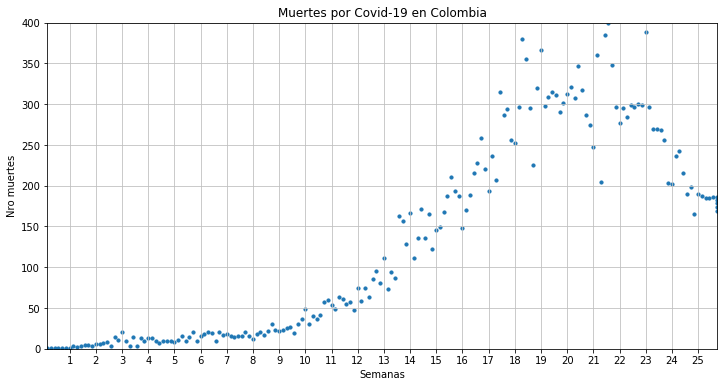

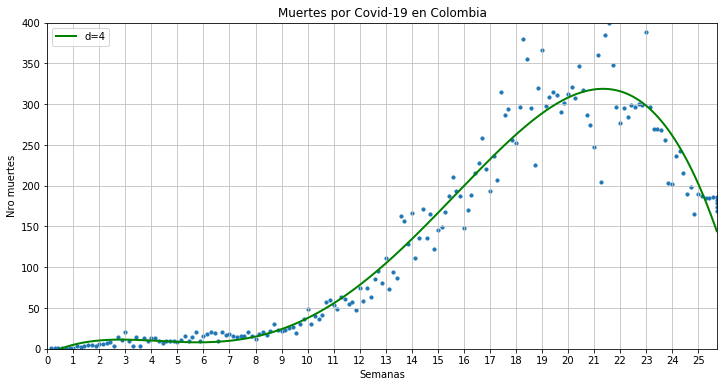

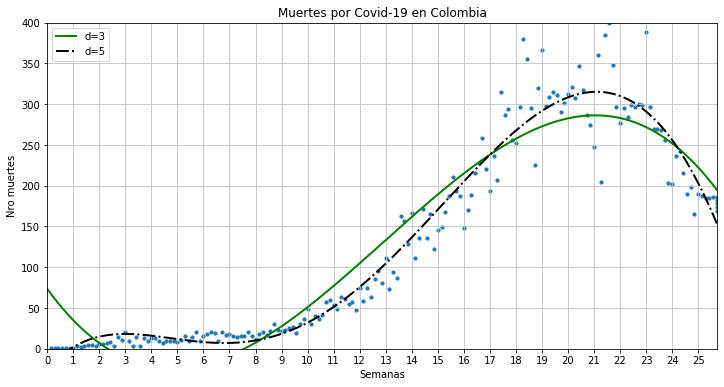

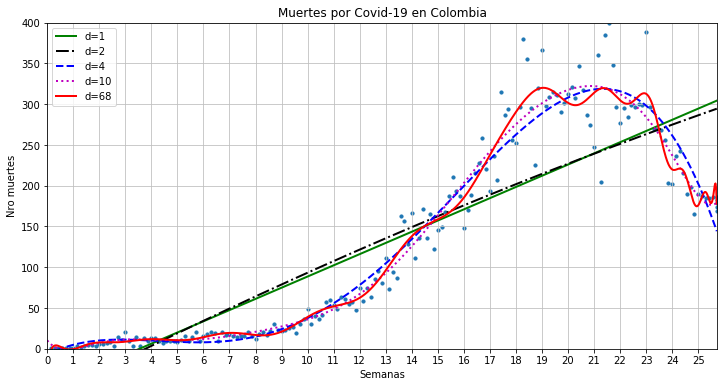

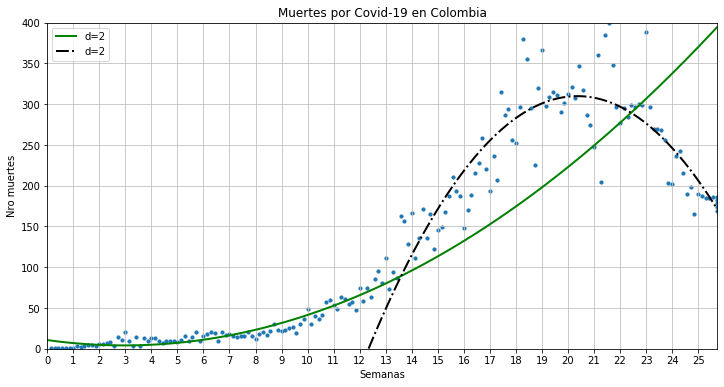

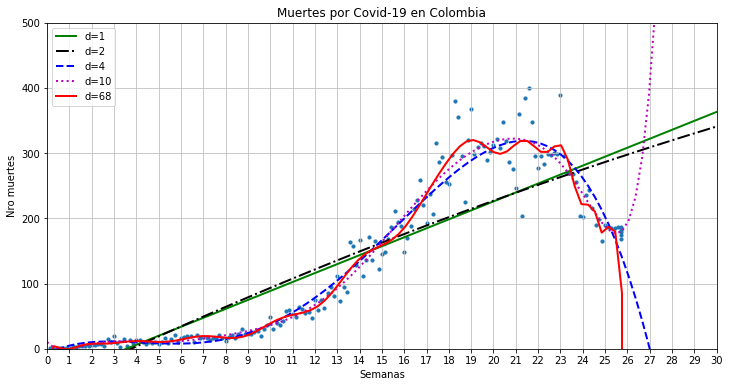

In [6]:
# Esta funcion nos permite definir los modelos y el comportamiento 
# de un ajuste con base en un grado polinomial elegido
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(12, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Título superior
    plt.title("Muertes por Covid-19 en Colombia")
    
    # Título en la base
    plt.xlabel("Semanas")
    
    # Título lateral
    plt.ylabel("Nro muertes")
    
    # Los primeros corchetes ([]) se refieren a los puntos en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    # w*7 es la agrupacion de puntos por semana, por lo que
    # el valor de w nos permite ver estos puntos por semana desde 1 hasta
    # 25, lo cual constituye las semanas analizadas
    plt.xticks([w *7 for w in range(100)], ['%i' % w for w in range(100)])

    # Aquí se evalúa el tipo de modelo
    if models:
        # Si no se define ningún valor para mx, este valor será
        # calculado con la función linspace la cual devuelve 
        # números espaciados uniformemente 
        # en este caso,sobre el conjunto de valores x
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
            
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve
        # Aquí se realiza un ciclo
        #Dependiendo del modelo, estilo de linea y color dibuja la grafica de dispersion
        #Con su respectivo tipo de funcion polinomial
        for model, style, color in zip(models, linestyles, colors):
            #Muestra en pantalla la ecuacion de la funcion
            #print ("Modelo: ", model)
            #Retorna una lista con todos los valores, excepto los de valor 0
            #print ("Coeffs: ", model.coeffs)
            #Dibuja la grafica con el valor de x, el valor de la funcion evaluada en ese punto,
            #el tipo de linea, el ancho de la misma y el color
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        
        # Esta funcion recibe el numero identificador del modelo y la ubicacion en la grafica
        # para este caso, nos dibuja en la parte superior izquierda la lista de modelos visualizados
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    
    #realiza el ajuste de escalamiento automático en el eje o ejes especificados.
    plt.autoscale(tight=True)
    
    #se establecen los límites-y de los ejes actuales.
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    
    # Se configuran las líneas de la cuadrícula.
    plt.grid(True, linestyle='-', color='0.75')
    # Se guarda la figura creada después de graficar los datos
    plt.savefig(fname)

# Primera mirada a los datos
# os.path.join, une a uno o más componentes de ruta de forma inteligente. 
# Este método concatena varios componentes de la ruta con exactamente 
# un separador de directorio ("/") después de cada parte no vacía, 
#excepto el último componente de la ruta. Si el último componente de la ruta 
#que se va a unir está vacío, se coloca un separador de directorio ("/") al final.

plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# la funcion polyfit de numpy, realiza un ajuste polinomial de minimos cuadrados
# recibe como parametros los vectores, el grado del polinomio y el Valor full
# en caso de ser falso, solo se devuelven los coeficientes
# cuando es Verdadero, se devuelve la información de diagnóstico almacenada
# en las siguientes variables
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
#print("Parámetros del modelo fp1: %s" % fp1)
#print("Error del modelo fp1:", res1)
# la función poly1d, ayuda a definir una función polinomial. 
# Facilita la aplicación de "operaciones naturales" en polinomios.
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
#print("Parámetros del modelo fp2: %s" % fp2)
#print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f4 = sp.poly1d(np.polyfit(x, y, 4))
f5 = sp.poly1d(np.polyfit(x, y, 5))
f6 = sp.poly1d(np.polyfit(x, y, 6))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

# Se grafican los modelos, en cada modelo existen diferentes funciones
# polinomiales, la primera la grafica con una funcion de grado #4
# la segunda, la grafica con una de grado #3 y #5 simultaneamente
# guarda estas figuras en la carpeta "CHART_DIR" y la titula con su respectivo nombre
plot_models(x, y, [f4], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f3, f5], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(x, y, [f1, f2, f4, f10, f100], os.path.join(CHART_DIR, "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# Se escoge este punto ya que es cuando vemos un cambio brusco 
# en la grafica, es decir, donde cambia la funcion cuadrada por una lineal
inflexion = 13.5 * 7
#xa el numero de dias hasta la semana 13.5 (punto de inflexion)
#ya el numero de muertes por dia en xa
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]

#xb el numero de horas a partir de la semana 13.5 (punto de inflexion)
#yb el numero de muertes por dias en xb
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# fa y fb son funciones de grado #2
fa = sp.poly1d(np.polyfit(xa, ya, 2))
fb = sp.poly1d(np.polyfit(xb, yb, 2))

# Se presenta el modelo basado en el punto de inflexión
# se aplica la funcion que se definio anteriormente
# como parametros se le envian los vectores x & y, las funciones fa & fb
# la direccion y nombre donde se va a guardar
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

# Función de error
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f4, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f4, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

# Se extrapola de modo que se proyecten respuestas en el futuro 
# (semana 26 y semana 27)
plot_models(x, y, [f1, f2, f4, f10, f100], os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7, 30 * 7, 100), ymax=500, xmin=0 * 7)

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
#funcion de grado #1
fb1 = fb
#funcion de grado #2
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
#funcion de grado #3
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
#funcion de grado #10
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
#funcion de grado #100
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb4, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión}
plot_models(x, y, [fb1, fb2, fb4, fb10, fb100], os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7, 30 * 7, 100), ymax=500, xmin=0 * 7)
    
# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
# frac es una pequeña fraccion de datos que se toma, en este caso del 30%
# esto se hace para optimizar y disminuir la complejidad de utilizar el 100% de los datos
# y asi garantizar una pronta respuesta
frac = 0.3
# se guarda el valor exacto del 30% de los valores de xb
split_idx = int(frac * len(xb))
#print ("split_idx: ", split_idx)
# se guardan los indices de los valores varajados
shuffled = sp.random.permutation(list(range(len(xb))))
#print ("shuffled: ", shuffled)
# se ordenan los indices anteriores para comprobar que si esten todos

# primeros 54 valores de xb ordenados
test = sorted(shuffled[:split_idx])
#print ("test: ", test)

# ultimos 54 valores de xb ordenados
train = sorted(shuffled[split_idx:])
#print ("train: ", train)

#se crean las funciones de grado #1 y #2 con los ultimos 54 valores
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100= \n%s" % (fbt2-100))
fbt4 = sp.poly1d(np.polyfit(xb[train], yb[train], 4))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

# Se hace este ciclo para calcular el error en cada funcion presentada
print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt4, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

#dibuja la grafica con las funciones de diferentes polinomios
plot_models(x, y, [fbt1, fbt2, fbt4, fbt10, fbt100], os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7, 30 * 7, 100), ymax=500, xmin=0 * 7)

# Se importa la funcion fsolve de la libreria scipy.optimize 
# esta encuentra las raíces de una función.
from scipy.optimize import fsolve
#print(fbt2)
#print(fbt2 - 100)
# Se hace una aproximacion con la funcion fsolve
# restandole a la funcion de grado #2,100 muertes/dia
# se le manda un x0 con el objetivo de disminuir los tiempos de respuesta
# se divide por (7) para encontrar el valor de la semana en la que se vera el valor (100)
alcanzado_max = fsolve(fbt2 - 100, x0=200) / (7)
print("\nLas cien (100) muertes por Covid-19 en Colombia se esperan en la semana %f" %alcanzado_max[0])